In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact_manual
import ipywidgets as wd

from os import system

# Guillier et al. model (2020)

In [2]:
def Guillier2020(Temp):
    '''Other Constants in the model'''
    LOG10DREF = 2.3
    TREF = 4.0 
    ZT = 29.1
    
    log10D = lambda T : LOG10DREF - ((T - TREF)/ZT)**2      
    D = np.power(10.0,log10D(Temp))
    
    decayRate = np.log(10.0)/D #hour^-1
    
    if type(Temp) is float:
        print("Guillier et al. (2020)")
        print("Time to 1-log reduction [h] = {0:.4E} ".format(D))
        print("                        [d] = {0:.4E} ".format(D/24))
        print("")
        print("Time to 6-log reduction [h] = {0:.4E} ".format(D*6))
        print("                        [d] = {0:.4E} ".format(D*6/24))
        
        print("decay Rate [1/h] = {0:.2E} ".format(decayRate))
        print("           [1/d] = {0:.2E} ".format(decayRate*24))
        print("           [1/s] = {0:.4E} ".format(decayRate/3600))
        
    return decayRate/3600

In [3]:
def Bivins2020(Temp):
    SLOPE = 0.07
    YINTERCEPT = -2.5
    
    log10K = lambda T : SLOPE*T + YINTERCEPT
    decayRate = np.power(10.0,log10K(Temp)) #day^-1
    
    if type(Temp) is float:      
        print("Bivins et al. (2020)")
        print("decay Rate [1/h] = {0:.2E} ".format(decayRate/24))
        print("           [1/d] = {0:.2E} ".format(decayRate))
        print("           [1/s] = {0:.4E} ".format(decayRate/86400))
    
    return decayRate/86400

In [4]:
def Silverman2020(Temp):
    SLOPE = 0.065
    YINTERCEPT = -1.66
    
    log10K = lambda T : SLOPE*T + YINTERCEPT
    decayRate = np.power(10.0,log10K(Temp)) #day^-1
    
    if type(Temp) is float:      
        print("Silverman et Boehm (2020)")
        print("decay Rate [1/h] = {0:.2E} ".format(decayRate/24))
        print("           [1/d] = {0:.2E} ".format(decayRate))
        print("           [1/s] = {0:.4E} ".format(decayRate/86400))
    
    return decayRate/86400

In [5]:
def AhmedRNA2020(Temp):
    SLOPE = 0.016
    YINTERCEPT = -1.16
    
    log10K = lambda T : SLOPE*T + YINTERCEPT
    decayRate = np.power(10.0,log10K(Temp)) #day^-1
    
    if type(Temp) is float:      
        print("Ahmed et al. -RNA- (2020)")
        print("decay Rate [1/h] = {0:.2E} ".format(decayRate/24))
        print("           [1/d] = {0:.2E} ".format(decayRate))
        print("           [1/s] = {0:.4E} ".format(decayRate/86400))
    
    return decayRate/86400

In [6]:
def deOliveira2021():
    T = np.array([4,24])
    decayRate = {"RiverWater" : np.array([0.16,0.37])/86400.,
                 "WasteWater" : np.array([0.19,0.83])/86400.}  #day^-1
    return (T,decayRate)

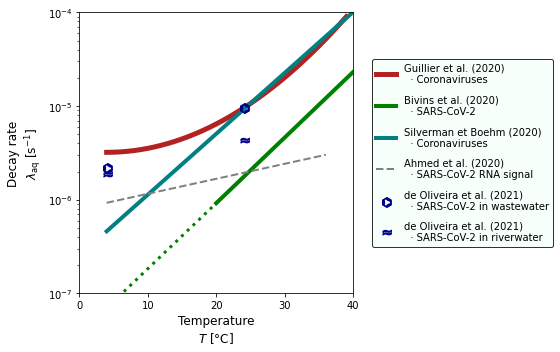

In [37]:
plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

## Guillier 2020
T = np.arange(4,40,1)
plt.plot(T,Guillier2020(T),\
         label="Guillier et al. (2020)\n  · Coronaviruses",\
         c="firebrick",lw=5)

## Bivins 2020
T = np.arange(20,70,1)
T1 = np.arange(4,25,1)
plt.plot(T,Bivins2020(T),\
         label="Bivins et al. (2020)\n  · SARS-CoV-2",\
         c="green",lw=4)
plt.plot(T1,Bivins2020(T1),\
         c="green",lw=3,ls="dotted")

## Silverman 2020
T = np.arange(4,50,1)
plt.plot(T,Silverman2020(T),\
         label="Silverman et Boehm (2020)\n  · Coronaviruses",\
         c="teal",lw=4)

## Ahmed 2020
T = np.arange(4,37,1)
plt.plot(T,AhmedRNA2020(T),\
         label="Ahmed et al. (2020)\n  · SARS-CoV-2 RNA signal",\
         c="gray",lw=2,ls="dashed")

## deOliveira 2021
plt.scatter(deOliveira2021()[0],deOliveira2021()[1]['WasteWater'],\
            label="de Oliveira et al. (2021)\n  · SARS-CoV-2 in wastewater",\
            c="darkblue",marker="$\u232C$",s=100,zorder=4)

plt.scatter(deOliveira2021()[0],deOliveira2021()[1]['RiverWater'],\
            label="de Oliveira et al. (2021)\n  · SARS-CoV-2 in riverwater",\
            c="darkblue",marker=r"$\approx$",s=100,zorder=4)

## Miscelaneous
ax.set(yscale="log",ylim=[1.0E-7,1.0E-4])
font = {'size': 12}
ax.set_ylabel("Decay rate\n"+r"$\lambda_{\rm aq}$ [s$^{-1}$]",fontdict=font)
ax.set_xlabel("Temperature\n"+r"$T$ [°C]",fontdict=font)
ax.set(xlim=[0,40],xticks=[0,10,20,30,40])
## Legend

#ax.legend(loc="lower right",ncol=3,bbox_to_anchor=(1.0,1.05),\
#           edgecolor='k',facecolor='mintcream')
ax.legend(loc="center left",ncol=1,bbox_to_anchor=(1.05,0.5),\
           edgecolor='k',facecolor='mintcream',labelspacing=1)


plt.tight_layout()

plt.show()